In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import random
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN, GlobalAveragePooling2D
from keras.applications.resnet import ResNet50
from keras import initializers
from keras.optimizers import RMSprop
import time


Using TensorFlow backend.


### Print Dataset Directory

In [2]:
data_dir = os.listdir('../../../train_ds/')
for data in data_dir: 
    print(data)

cremad4896-5.wav
cremad5772-1.wav
tess1191-4.wav
cremad503-5.wav
cremad4190-3.wav
cremad864-2.wav
cremad205-0.wav
cremad2123-1.wav
cremad5581-4.wav
tess617-5.wav
cremad1081-2.wav
tess1319-1.wav
cremad4916-0.wav
tess1884-2.wav
tess994-3.wav
cremad6612-0.wav
tess118-0.wav
cremad7116-1.wav
cremad2178-0.wav
tess1164-4.wav
cremad6652-3.wav
cremad5045-3.wav
tess1221-1.wav
cremad4804-2.wav
tess2653-6.wav
cremad1223-1.wav
cremad4846-4.wav
tess625-5.wav
cremad3378-5.wav
cremad3639-5.wav
cremad6468-3.wav
cremad3940-1.wav
cremad1890-2.wav
cremad3626-4.wav
tess2677-6.wav
cremad4406-1.wav
tess502-0.wav
cremad6539-5.wav
cremad4591-1.wav
cremad6007-4.wav
tess1786-5.wav
cremad6846-5.wav
cremad2790-3.wav
tess2787-6.wav
cremad5995-1.wav
cremad2751-3.wav
cremad7193-2.wav
tess1406-2.wav
cremad1008-4.wav
cremad2195-2.wav
cremad1725-5.wav
tess404-0.wav
cremad6143-3.wav
cremad3105-4.wav
tess290-3.wav
tess2161-6.wav
tess631-5.wav
cremad5200-1.wav
cremad2009-3.wav
cremad1049-4.wav
cremad7103-5.wav
cremad463-5.

cremad3969-0.wav
tess1182-4.wav
cremad2745-3.wav
cremad4446-1.wav
cremad6103-0.wav
cremad3767-4.wav
cremad1612-3.wav
cremad2117-3.wav
cremad3589-4.wav
tess747-5.wav
tess658-5.wav
cremad5075-3.wav
tess2090-6.wav
cremad1687-4.wav
cremad4378-1.wav
cremad7340-4.wav
cremad155-4.wav
cremad3493-4.wav
cremad363-1.wav
cremad2006-3.wav
tess1202-1.wav
cremad4346-2.wav
tess1595-2.wav
cremad4286-1.wav
cremad1641-1.wav
cremad5149-1.wav
cremad1394-4.wav
cremad4098-5.wav
cremad7168-1.wav
cremad1579-4.wav
cremad2685-2.wav
tess708-5.wav
cremad7382-2.wav
cremad3413-5.wav
tess1367-1.wav
cremad2363-1.wav
cremad6455-2.wav
cremad7332-1.wav
cremad2416-1.wav
savee398-1.wav
cremad4085-5.wav
tess669-5.wav
tess2797-6.wav
cremad484-0.wav
tess2136-6.wav
cremad6651-4.wav
tess774-5.wav
cremad5836-0.wav
cremad6619-0.wav
cremad5549-1.wav
cremad1252-5.wav
tess1287-1.wav
cremad3542-2.wav
tess1858-2.wav
cremad7118-5.wav
cremad132-3.wav
cremad2380-5.wav
tess945-3.wav
tess2358-1.wav
tess2112-6.wav
tess1780-5.wav
cremad482-2

cremad6454-4.wav
cremad6244-2.wav
cremad4387-2.wav
savee62-4.wav
cremad3712-4.wav
cremad567-3.wav
cremad7414-4.wav
cremad4488-1.wav
cremad4144-2.wav
cremad2988-5.wav
tess2591-4.wav
tess794-5.wav
tess488-0.wav
cremad6567-5.wav
cremad6843-3.wav
cremad2543-3.wav
cremad6516-1.wav
cremad2849-2.wav
cremad5444-1.wav
cremad989-2.wav
cremad2926-2.wav
cremad5837-4.wav
cremad2940-1.wav
cremad701-3.wav
cremad4505-3.wav
cremad5317-0.wav
cremad6093-1.wav
cremad1893-4.wav
cremad4278-4.wav
cremad425-4.wav
cremad6694-1.wav
tess1347-1.wav
cremad483-3.wav
cremad1487-0.wav
cremad1788-5.wav
tess675-5.wav
cremad3097-0.wav
cremad4266-1.wav
cremad6713-2.wav
cremad1518-0.wav
cremad4970-0.wav
cremad2238-5.wav
cremad3927-3.wav
cremad7127-0.wav
cremad3316-1.wav
cremad6336-0.wav
tess2526-4.wav
cremad854-3.wav
cremad7169-0.wav
cremad5630-5.wav
tess1111-4.wav
cremad6541-1.wav
tess2455-4.wav
tess150-0.wav
savee335-5.wav
savee158-1.wav
cremad4637-2.wav
tess161-0.wav
cremad1344-5.wav
cremad6015-5.wav
cremad2140-1.wav
t

### Import Dataset

In [3]:
data = pd.DataFrame(columns=['path', 'label'])

cnt = 0
for file in data_dir:
    nm = file.split('.')[0].split('-')
    path = '../../../train_ds/' + file
    label = int(nm[1])

    data.loc[cnt] = [path, label]
    cnt += 1

data.head()

,path,label
0,../../../train_ds/cremad4896-5.wav,5
1,../../../train_ds/cremad5772-1.wav,1
2,../../../train_ds/tess1191-4.wav,4
3,../../../train_ds/cremad503-5.wav,5
4,../../../train_ds/cremad4190-3.wav,3



### Testing imported Data


In [4]:
filename = data.path[3]
print (filename)

samples, sample_rate = librosa.load(filename)

../../../train_ds/cremad503-5.wav


In [5]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

### Plotting raw Wave Form and Spectrogram

Text(0.5, 0, 'Seconds')

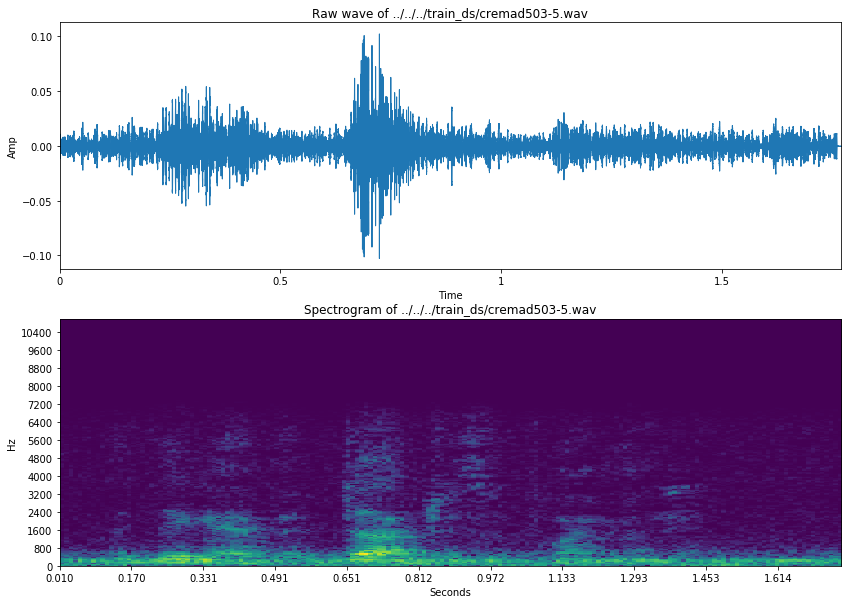

In [6]:
# Plotting Wave Form and Spectrogram

freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amp')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Hz')
ax2.set_xlabel('Seconds')

### Cepstral Mean Normalization

In [7]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)

spectrogram = (spectrogram - mean) / std

### Plotting Mel Power Spectrogram

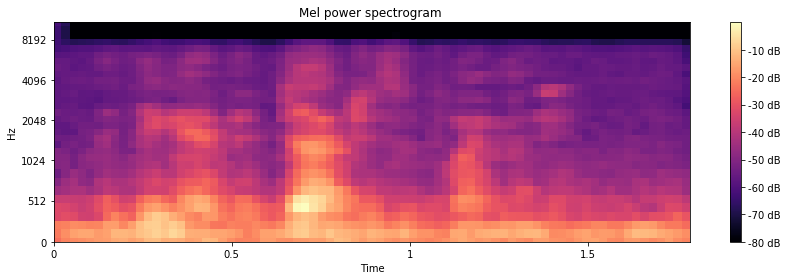

In [8]:
mps = librosa.feature.melspectrogram(samples,
                                     sr=sample_rate,
                                     n_mels=32)

# Convert to log scale
log_mps = librosa.power_to_db(mps, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_mps, sr=sample_rate,
                         x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### MFCC Color Translation

In [9]:
def mfcc_to_rgb(mfcc):
    r_mfcc = mfcc.copy()
    g_mfcc = mfcc.copy()
    b_mfcc = mfcc.copy()
    for x in range(mfcc.shape[0]):
        for y in range(mfcc.shape[1]):
            # red channel
            if r_mfcc[x][y] < 0:
                r_mfcc[x][y] = 0
            else:
                r_mfcc[x][y] = r_mfcc[x][y] / 200
            # green channel
            if g_mfcc[x][y] < -200:
                g_mfcc[x][y] = 0
            elif g_mfcc[x][y] > 0:
                g_mfcc[x][y] = 1
            else:
                g_mfcc[x][y] = (g_mfcc[x][y] + 200) / 200
            # blue channel
            if b_mfcc[x][y] < -600:
                b_mfcc[x][y] = 0
            elif b_mfcc[x][y] > -200:
                b_mfcc[x][y] = 1
            else:
                b_mfcc[x][y] = (b_mfcc[x][y] + 600) / 600
    r_mfcc = np.stack((r_mfcc, g_mfcc, b_mfcc,), axis=-1)
    return r_mfcc

### Plotting MFCC

In [10]:
mfcc = librosa.feature.mfcc(y=samples, n_mfcc=32)
mfcc = mfcc_to_rgb(mfcc)

print(mfcc.shape)

(32, 77, 3)


In [11]:
data2 = data.copy()
data2.head()

,path,label
0,../../../train_ds/cremad4896-5.wav,5
1,../../../train_ds/cremad5772-1.wav,1
2,../../../train_ds/tess1191-4.wav,4
3,../../../train_ds/cremad503-5.wav,5
4,../../../train_ds/cremad4190-3.wav,3


### Convert dataset paths into mfccs

In [12]:
data = pd.DataFrame(columns=['feature', 'label'])

for i in tqdm(range(int(len(data2) * 0.2))):
    X, sample_rate = librosa.load(data2.path[i], duration=5, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=32)
    rest = np.zeros((32, 435 - mfcc.shape[1]))
    mfcc = np.hstack((mfcc, rest))
    mfccs = mfcc_to_rgb(mfcc)
    data.loc[i] = [mfccs, data2.label[i]]

data.head()

100%|██████████| 2144/2144 [03:24<00:00, 10.51it/s]


,feature,label
0,"[[[0.0, 0.0, 0.2298797098795573], [0.0, 0.0, 0...",5
1,"[[[0.0, 0.0, 0.2987100219726562], [0.0, 0.0, 0...",1
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",4
3,"[[[0.0, 0.0, 0.179886474609375], [0.0, 0.0, 0....",5
4,"[[[0.0, 0.0, 0.09418904622395834], [0.0, 0.0, ...",3


### Split Test set before augmentation

In [13]:
X_test = data['feature'].values.tolist()
X_test = np.reshape(X_test, (int(len(data2) * 0.2), 32, 435, 3))
y_test = data.label
lb = LabelEncoder()
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

### Define Data Augmentation Methods

In [14]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

def noise(data):
    """
    Adding White Noise.
    """
    noise_amp = 0.03*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 1
    pitch_change =  pitch_pm * 1.05 *(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=0.7,high=2.5)
    return (data * dyn_change)


### Save Augmented Data for testing

In [15]:
X, sample_rate = librosa.load(data2.path[0])
noise_sample = noise(X)
librosa.output.write_wav('noise_sample.wav', noise_sample, sample_rate)
shift_sample = shift(X)
librosa.output.write_wav('shift_sample.wav', shift_sample, sample_rate)
pitch_sample = pitch(X, sample_rate)
librosa.output.write_wav('pitch_sample.wav', pitch_sample, sample_rate)
dyn_change_sample = dyn_change(X)
librosa.output.write_wav('dyn_change_sample.wav', dyn_change_sample, sample_rate)

### Increase Train Set by using Data Augmentation

In [16]:
def rnd_aug(audio_wav):
    perc = np.random.rand()
    if perc < 0.25:
        audio_wav = noise(audio_wav)
    elif perc < 0.5:
        audio_wav = shift(audio_wav)
    elif perc < 0.75:
        audio_wav = pitch(audio_wav, 44100)
    elif perc < 1:
        audio_wav = dyn_change(audio_wav)
    return audio_wav

In [17]:
def batch_generator(audio_wav_paths, labels, batch_size, istraining):
    lb = LabelEncoder()
    while True:
        batch_mfcc = []
        batch_label = []
        for i in range(batch_size):
            if istraining:
                rnd_idx = random.randint(int(len(audio_wav_paths) * 0.2),
                                         int(len(audio_wav_paths) * 0.8))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=5, res_type='kaiser_fast')
                label = data2.label[rnd_idx]
                #aug_audio_wav = rnd_aug(X)
            else:
                rnd_idx = random.randint(int(len(audio_wav_paths) * 0.8),
                                         int(len(audio_wav_paths) - 1))
                X, sample_rate = librosa.load(data2.path[rnd_idx], duration=5, res_type='kaiser_fast')
                label = data2.label[rnd_idx]
            mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=32)
            rest = np.zeros((32, 435 - mfcc.shape[1]))
            mfcc = np.hstack((mfcc, rest))
            mfccs = mfcc_to_rgb(mfcc)
            mfccs = mfccs.reshape((32, 435, 3))
            batch_mfcc.append(mfccs)
            batch_label.append(np_utils.to_categorical(label, 7))
        yield(np.asarray(batch_mfcc), np.asarray(batch_label))

### Set up Keras util functions

In [18]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

### Define Keras Model

In [19]:
model = keras.models.Sequential([
    keras.applications.MobileNet(include_top=False,
             weights = 'imagenet',
             input_tensor = None,
             input_shape = (32, 435, 3),
             pooling = None,
             classes = 7),
    GlobalAveragePooling2D(),
    Dense(7, activation='softmax')
])

/home/ee1/anaconda3/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

In [21]:
hist = model.fit_generator(batch_generator(data2.path, data2.label, 20, 1),
                           steps_per_epoch=30,
                           epochs=40,
                           validation_data=batch_generator(data2.path, data2.label, 20, 0),
                           validation_steps=20,
                           verbose=1,
                           shuffle=0)

Epoch 1/40
30/30 [==============================] - 140s 5s/step - loss: 1.8858 - accuracy: 0.2800 - val_loss: 6.1023 - val_accuracy: 0.1850
Epoch 2/40
30/30 [==============================] - 120s 4s/step - loss: 1.5705 - accuracy: 0.3783 - val_loss: 4.5542 - val_accuracy: 0.2000
Epoch 3/40
30/30 [==============================] - 121s 4s/step - loss: 1.3966 - accuracy: 0.4567 - val_loss: 6.3430 - val_accuracy: 0.0450
Epoch 4/40
30/30 [==============================] - 117s 4s/step - loss: 1.3115 - accuracy: 0.5133 - val_loss: 4.2919 - val_accuracy: 0.2150
Epoch 5/40
30/30 [==============================] - 120s 4s/step - loss: 1.1842 - accuracy: 0.5533 - val_loss: 2.8475 - val_accuracy: 0.2075
Epoch 6/40
30/30 [==============================] - 111s 4s/step - loss: 1.1848 - accuracy: 0.5250 - val_loss: 2.9124 - val_accuracy: 0.2550
Epoch 7/40
30/30 [==============================] - 110s 4s/step - loss: 1.0795 - accuracy: 0.5767 - val_loss: 2.2737 - val_accuracy: 0.2775
Epoch 8/40
30

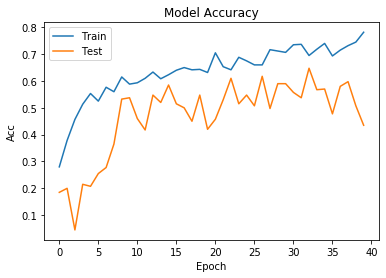

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.save('tl_xception_model19.h5')

### Test

In [24]:
results = model.evaluate(X_test, y_test)

2144/2144 [==============================] - 10s 5ms/step


In [25]:
print('test loss, test acc:', results)

test loss, test acc: [2.094614129457901, 0.45242536067962646]
